# Diabetes Prediction

## Import Packages

In [1]:
from pharmmod import PharmMod

## Read Data 

In [2]:
pm = PharmMod(path="https://raw.githubusercontent.com/sassoftware/sas-viya-workbench-demos/refs/heads/main/health-life-sciences/diabetes-prediction-through-synthetic-data/data/diabetes_prediction_dataset.csv",
              target="Outcome")

In [3]:
# The pm object belongs to the PharmMod class
type(pm)

pharmmod.pharmmod.PharmMod

In [4]:
# Data that was read into PharmMod resides in the dataframes attribute of pm
print(f"pm.dataframes is of type: {type(pm.dataframes)}")

pm.dataframes is of type: <class 'list'>


In [5]:
# Another method of ingesting data is to use the read_data command.  

pm.read_data(path="https://raw.githubusercontent.com/sassoftware/sas-viya-workbench-demos/refs/heads/main/health-life-sciences/diabetes-prediction-through-synthetic-data/data/diabetes_prediction_dataset.csv")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
len(pm.dataframes)

1

In [7]:
# Note that the target variable set when initialising the class is Outcome (contains a value of 0 or 1)
pm.target

'Outcome'

In [8]:
# Interested in learning about the starting odds of Outcome?  The starting_odds method helps you with the event rate.

pm.starting_odds(target="Outcome")

,count,proportion
Outcome,,
0,500,0.651042
1,268,0.348958


## Exploratory Data Analysis

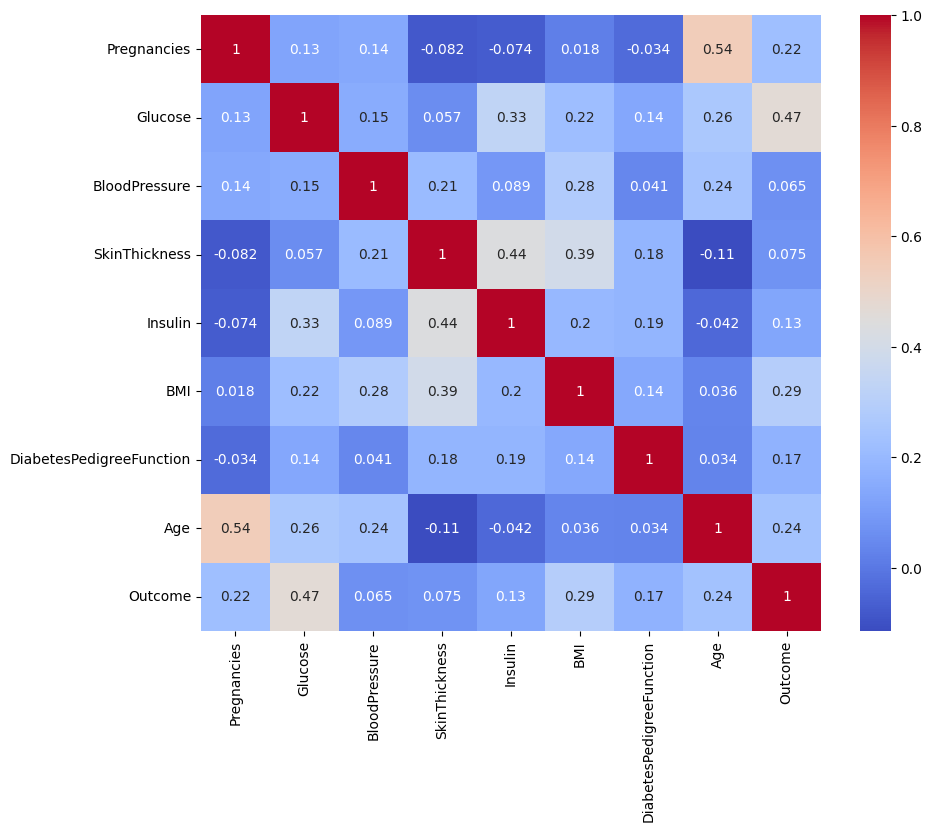

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
# Let's start with a standard correlation matrix of all interval features

pm.corr()

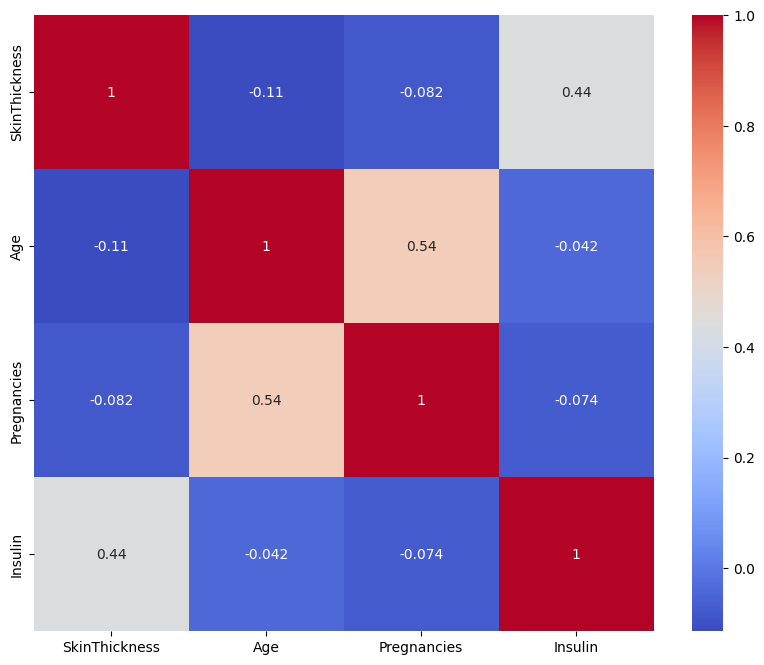

,SkinThickness,Age,Pregnancies,Insulin
SkinThickness,1.000000,-0.113970,-0.081672,0.436783
Age,-0.113970,1.000000,0.544341,-0.042163
Pregnancies,-0.081672,0.544341,1.000000,-0.073535
Insulin,0.436783,-0.042163,-0.073535,1.000000


In [10]:
# Interested in only a subset of columns?  Provide a list of columns to col 

columns = ["SkinThickness","Age","Pregnancies","Insulin"]
pm.corr(col=columns)

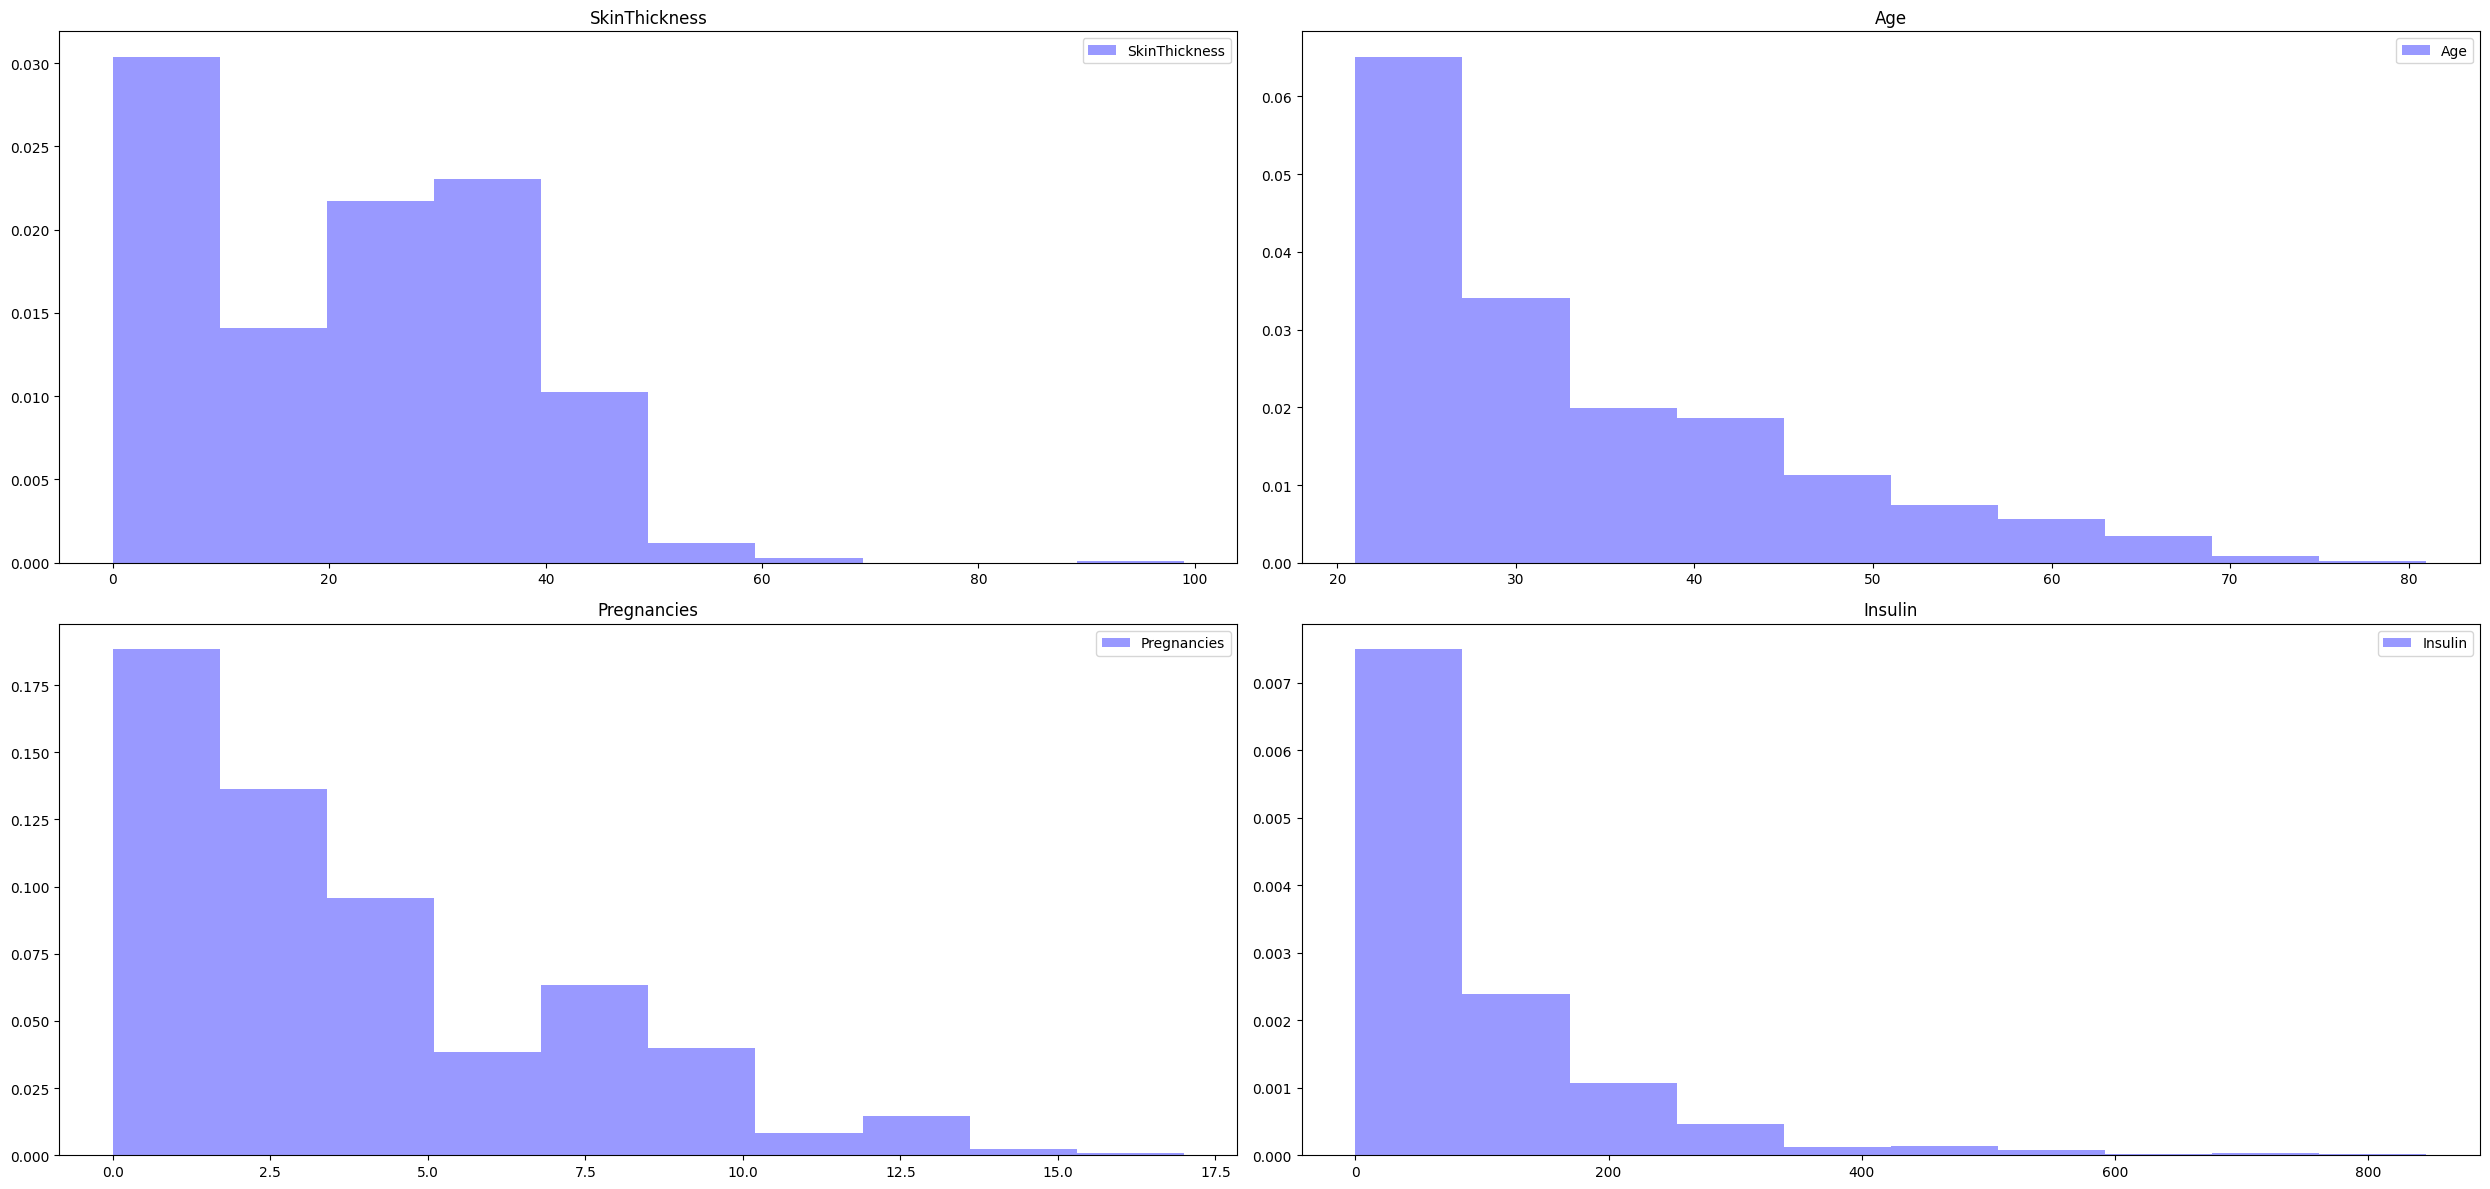

In [11]:
# What if you want to look at their distributions?  

pm.visualize(col=columns)

### Profile Data

#### The profile here is carried out using pandas native function as well as a package called YData_Profiling.
##### Note: YData_Profiling may take some time to run.  A separate html file is created and saved in the same 'python' folder.

In [12]:
pm.name="Pima Indians Diabetes Dataset"
pm.describe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 93902.33it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

,count,mean,std,min,25%,50%,75%,max,column_name
id,,,,,,,,,
0,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00,Pregnancies
1,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00,Glucose
2,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00,BloodPressure
3,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00,SkinThickness
4,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00,Insulin
5,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10,BMI
6,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42,DiabetesPedigreeFunction
7,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00,Age
8,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00,Outcome


### Prepare Data for Modelling

In [13]:
pm.partition()

In [14]:
# pm partition now creates three other entries in pm.dataframes, for Train (index = 1), Validation (index = 2) and Test (index = 3). 
# NOTE : This implementation might change to a different structure in future

len(pm.dataframes)

for idx, df in enumerate(pm.dataframes):
    print(f"{idx} : {len(df)}")

0 : 768
1 : 384
2 : 307
3 : 77


## Fit a Model

#### Let's fit a number of models to this data.  They are a mix of models from scikit-learn, xgboost and SAS (through the sasviya.ml library). Note that sasviya.ml models run only in SAS Viya Workbench or SAS Viya (2025.02 and later) environments

Training F1 Score: 68.7
Validation F1 Score: 63.21
Test F1 Score: 62.5


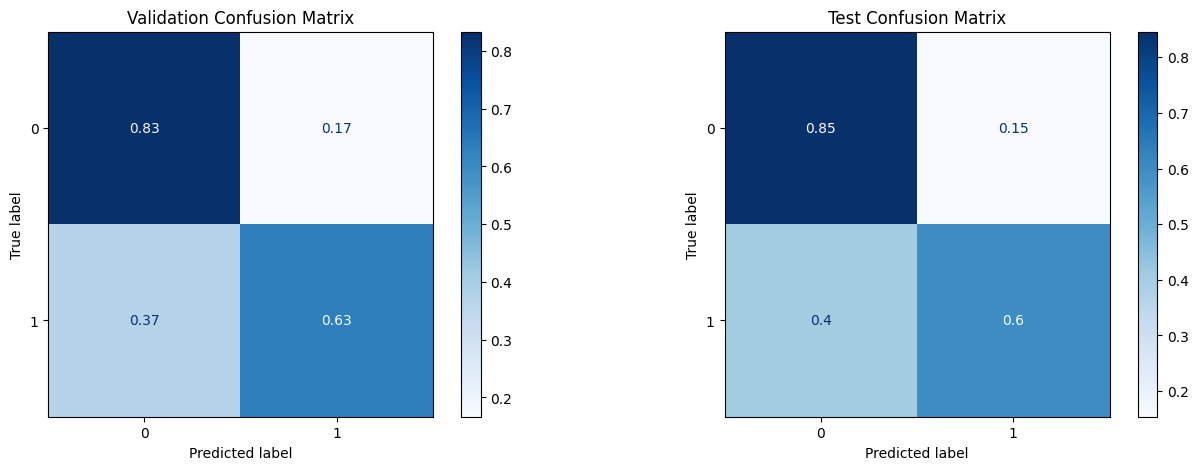

In [15]:
# Fit a Logistic Regression model (scikit-learn)

pm.logistic_regression()

Training F1 Score: 40.69
Validation F1 Score: 43.9
Test F1 Score: 29.79


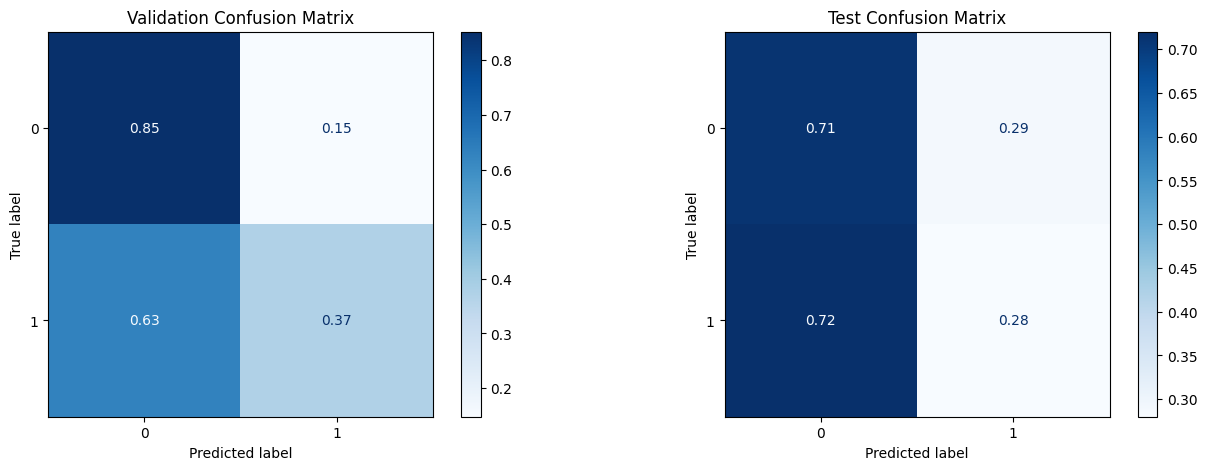

In [16]:
# Example of how you can control the input variables (and also, if needed, specify the target)

pm.logistic_regression(col=columns, target="Outcome")

Training F1 Score: 68.2
Validation F1 Score: 62.56
Test F1 Score: 61.22


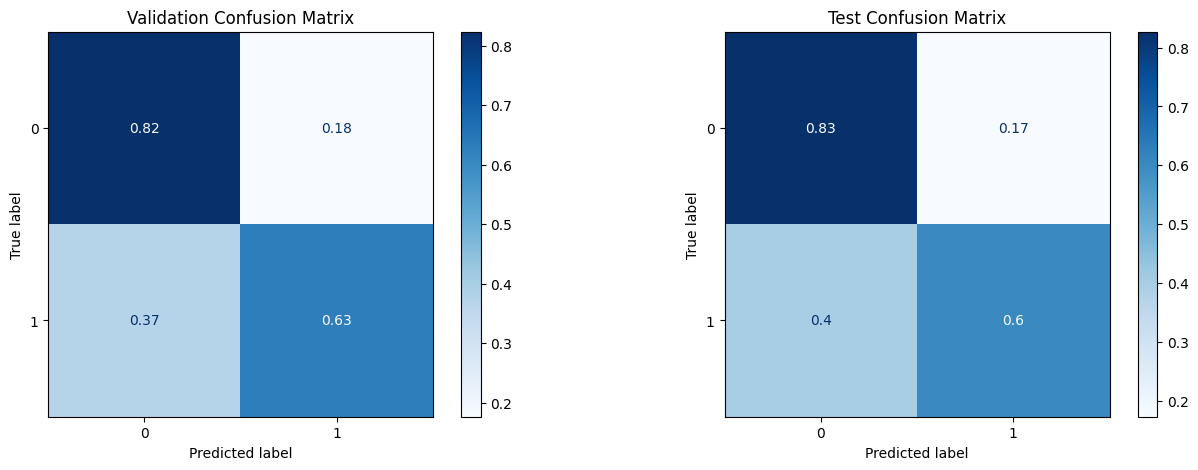

In [17]:
# Fit a logistic regression model from SAS

pm.sas_logistic_regression()

In [18]:
# A quick look at the models_run attribute, which maintains a list of models run against the object

pm.models_run

[{'model_type': 'Logistic Regression',
  'model': LogisticRegression(max_iter=500, random_state=42),
  'Training F1': 68.7,
  'Validation F1': 63.21,
  'Test F1': 62.5,
  'target': 'Outcome',
  'features': Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
         'BMI', 'DiabetesPedigreeFunction', 'Age'],
        dtype='object')},
 {'model_type': 'Logistic Regression',
  'model': LogisticRegression(max_iter=500, random_state=42),
  'Training F1': 40.69,
  'Validation F1': 43.9,
  'Test F1': 29.79,
  'target': 'Outcome',
  'features': ['SkinThickness', 'Age', 'Pregnancies', 'Insulin']},
 {'model_type': 'SAS Logistic Regression',
  'model': LogisticRegression(),
  'Training F1': 68.2,
  'Validation F1': 62.56,
  'Test F1': 61.22,
  'target': 'Outcome',
  'features': Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
         'BMI', 'DiabetesPedigreeFunction', 'Age'],
        dtype='object')}]

In [19]:
print(type(pm.models_run[0]["model"]))
print(type(pm.models_run[2]["model"]))

<class 'sklearn.linear_model._logistic.LogisticRegression'>
<class 'sasviya.ml.linear_model.logistic.LogisticRegression'>


### Decision Tree 

Training F1 Score: 100.0
Validation F1 Score: 53.21
Test F1 Score: 66.67


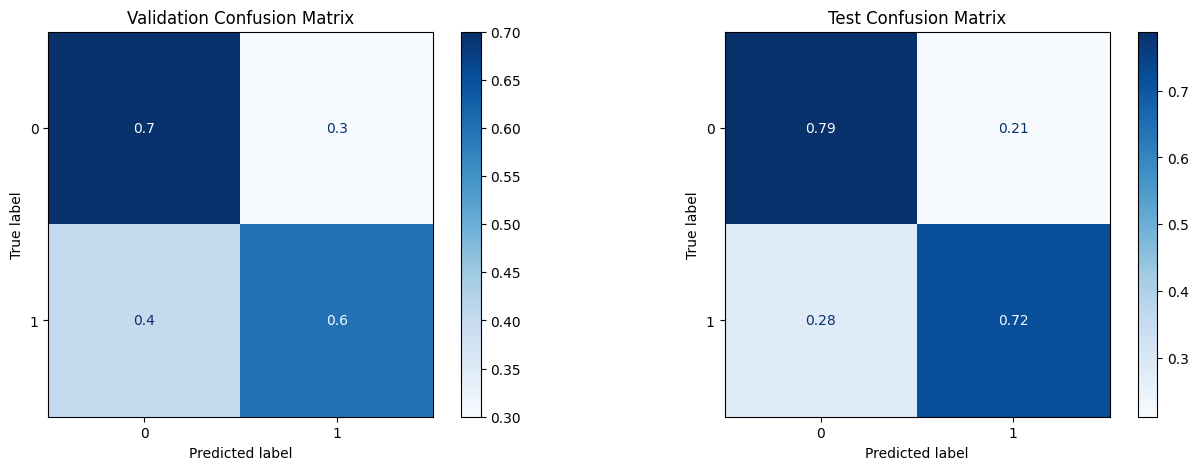

In [20]:
# Fit a decision tree classifier from scikit-learn

pm.decision_tree_classifier()

Training F1 Score: 73.08
Validation F1 Score: 60.64
Test F1 Score: 50.0


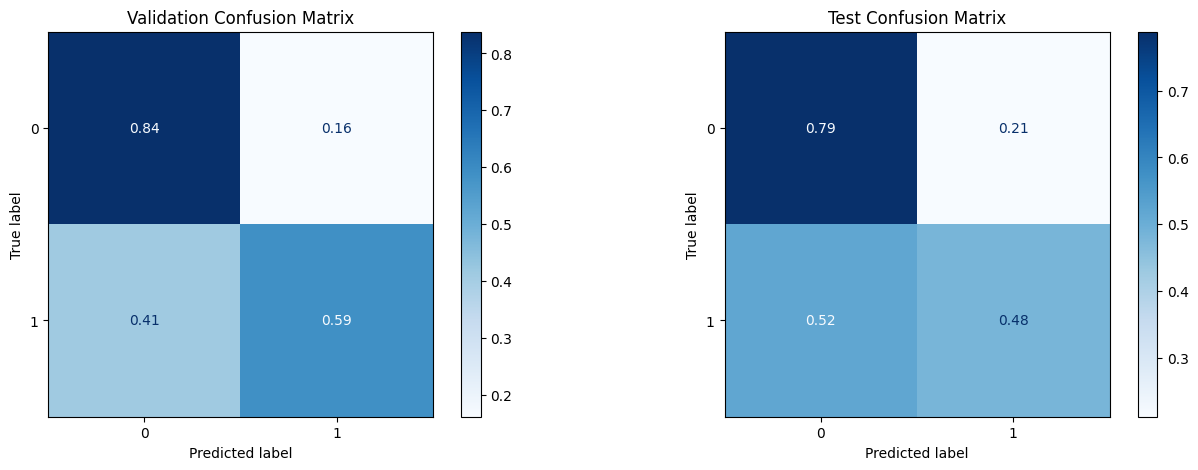

In [21]:
# Fit a decision tree classifier from sasviya.ml 
pm.sas_decision_tree_classifier()

### Forest Models

Training F1 Score: 100.0
Validation F1 Score: 64.36
Test F1 Score: 68.0


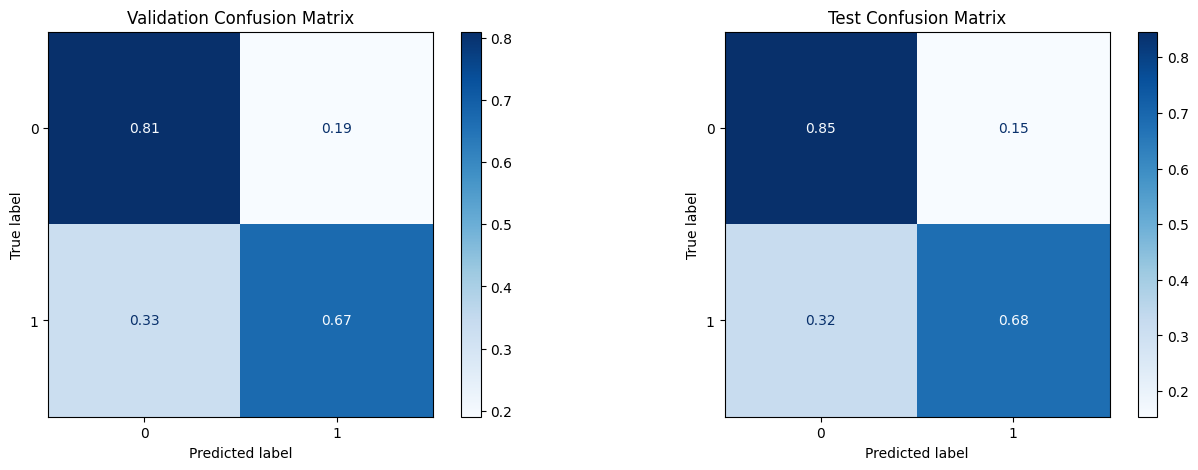

In [22]:
# Fit a random forest classifier from scikit-learn

pm.forest_classifier()

Training F1 Score: 85.62
Validation F1 Score: 66.98
Test F1 Score: 66.67


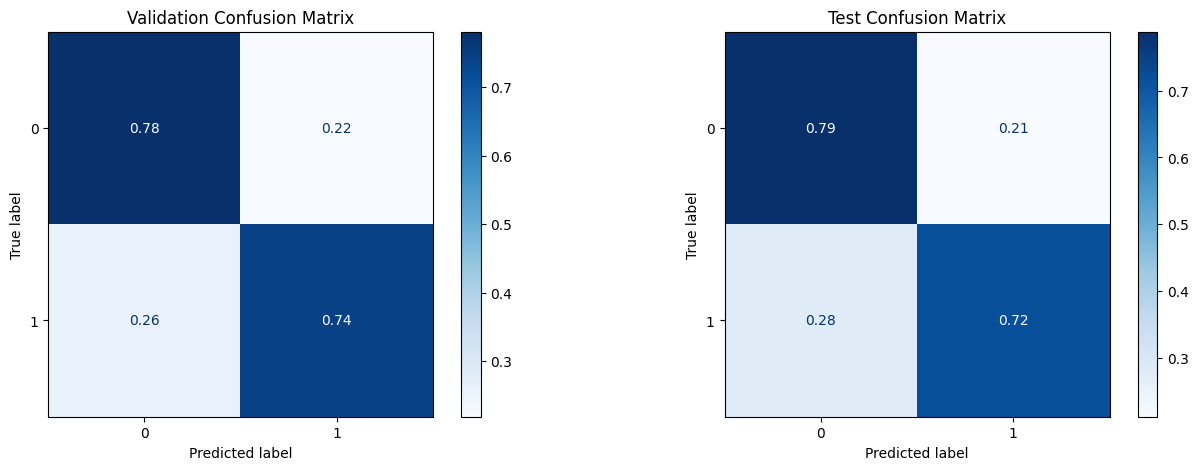

In [23]:
# fit a forest classifier from sasviya

pm.sas_forest_classifier()

Training F1 Score: 100.0
Validation F1 Score: 56.28
Test F1 Score: 58.33


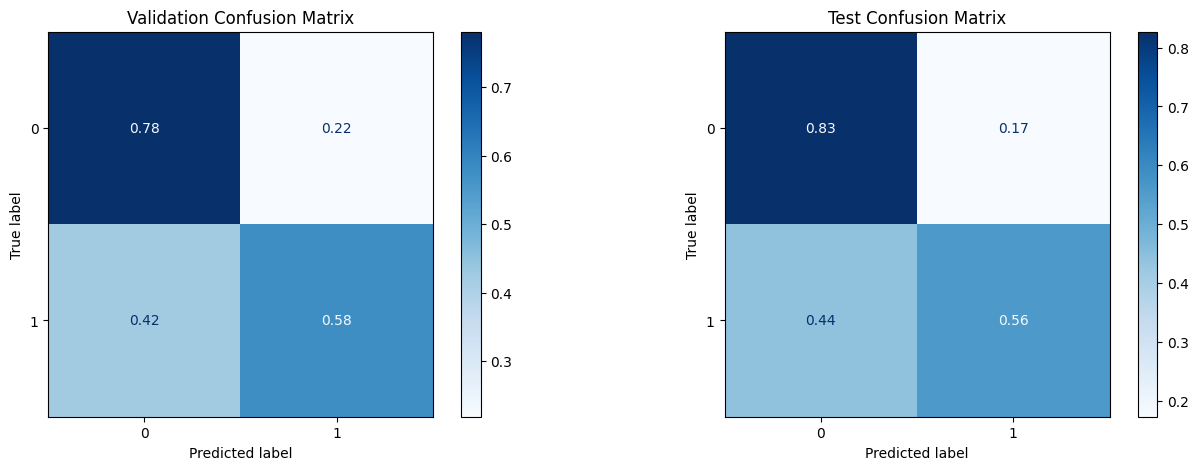

In [24]:
# fit a Gradient boosting model from xgboost

pm.xgboost_classifier()

Training F1 Score: 96.55
Validation F1 Score: 59.62
Test F1 Score: 66.67


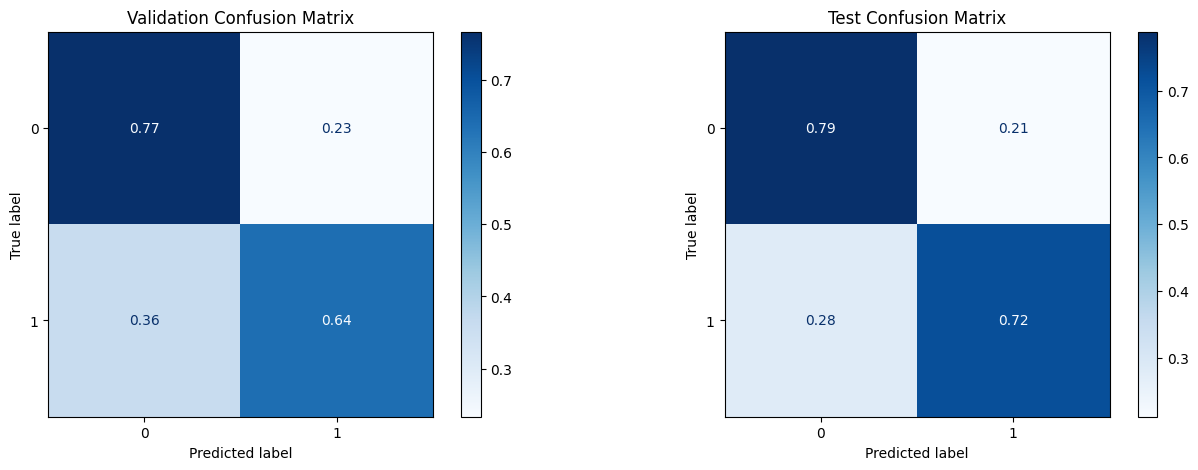

In [25]:
# fit a gradient boosting model from sasviya

pm.sas_gradboost_classifier()

### Other models

Training F1 Score: 65.62
Validation F1 Score: 58.24
Test F1 Score: 62.22


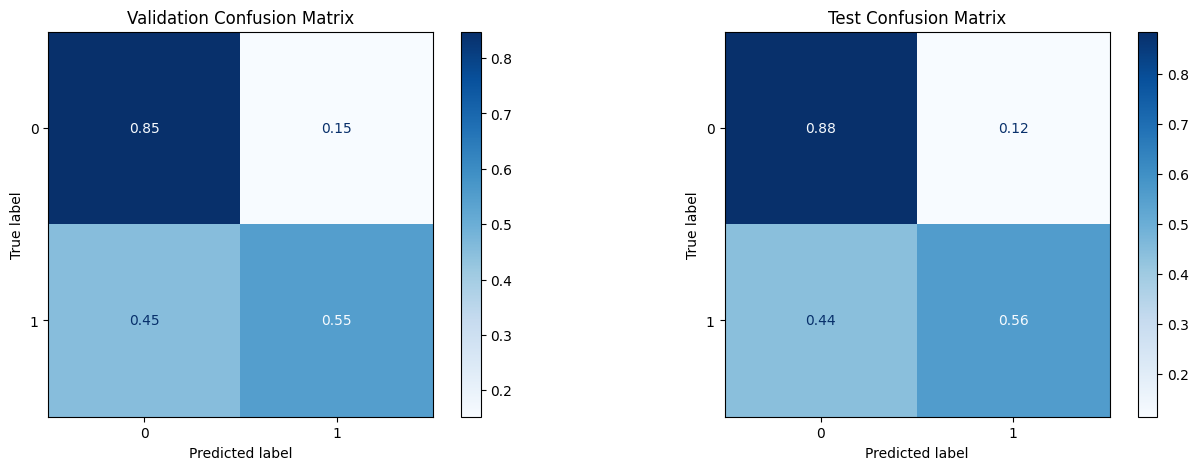

In [26]:
# Fit a Support Vector Machine classifier

pm.sas_support_vector_classifier()

## Downstream Activities - score, save, review 

In [27]:
# Review the pm.models_run attribute to see how many models have been run.

print(f"There have been {len(pm.models_run)} models developed so far.  The types are as follows:")

for idx,model in enumerate(pm.models_run):
    model_type = model["model_type"]
    print(f"{idx+1}. {model_type}")

There have been 10 models developed so far.  The types are as follows:
1. Logistic Regression
2. Logistic Regression
3. SAS Logistic Regression
4. Decision Tree Classifier
5. SAS Decision Tree Classifier
6. Random Forest Classifier
7. SAS Forest Classifier
8. XGBoost Classifier
9. SAS Gradient Boosting Classifier
10. SAS Support Vector Classifier


In [28]:
# Given a dataset, score the same with (for example) the SAS Support Vector Classifier

dataset = pm.dataframes[0]  # reusing original dataset
import pandas as pd

scored_output = pd.DataFrame()

scored_output["Predicted Outcome"] = pm.models_run[0]["model"].predict(dataset.drop("Outcome",axis=1))

scored_output.head(10)



,Predicted Outcome
0,1
1,0
2,1
3,0
4,1
5,0
6,0
7,1
8,1
9,0
